# **k-means and E-M Algorithm**

Machine Learning

**Name: Rosalinda Muñoz Gámez**

UASLP code: 303997

Gen 2021, Fac. Code: 202112300357

November 14th, 2024

*Abstract*

The k-means and EM algorithms are two widely used unsupervised learning techniques for clustering data. This paper explores the performance of the k-means algorithm in various scenarios, including cases with a non-optimal number of clusters, anisotropically distributed data blobs, unequal cluster variances, and unevenly sized clusters. The analysis highlights the strengths and limitations of the k-means approach, providing insights into when it may be more appropriate to use alternative clustering methods.

# 1. Introduction

The k-means algorithm is a simple and efficient method that aims to partition the data into k clusters by minimizing the sum of squared Euclidean distances between data points and their assigned cluster centroids. While k-means is a powerful tool, it has certain limitations and assumptions that may not always hold in real-world scenarios.
This paper investigates the behavior of the k-means algorithm in several challenging situations, including cases where the number of clusters is not optimal, the data blobs are anisotropically distributed, the cluster variances are unequal, and the cluster sizes are unevenly distributed. The goal is to provide a better understanding of the strengths and weaknesses of the k-means approach, and to offer insights into when alternative clustering methods may be more appropriate.
The analysis presented in this paper can help researchers and practitioners make informed decisions about the choice of clustering algorithm based on the characteristics of their data and the specific requirements of their application.

# 2. Content

In [1]:
import numpy as np

from sklearn.datasets import make_blobs

n_samples = 1500
random_state = 170
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]

X, y = make_blobs(n_samples=n_samples, random_state=random_state)
X_aniso = np.dot(X, transformation)  # Anisotropic blobs
X_varied, y_varied = make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)  # Unequal variance
X_filtered = np.vstack(
    (X[y == 0][:500], X[y == 1][:100], X[y == 2][:10])
)  # Unevenly sized blobs
y_filtered = [0] * 500 + [1] * 100 + [2] * 10

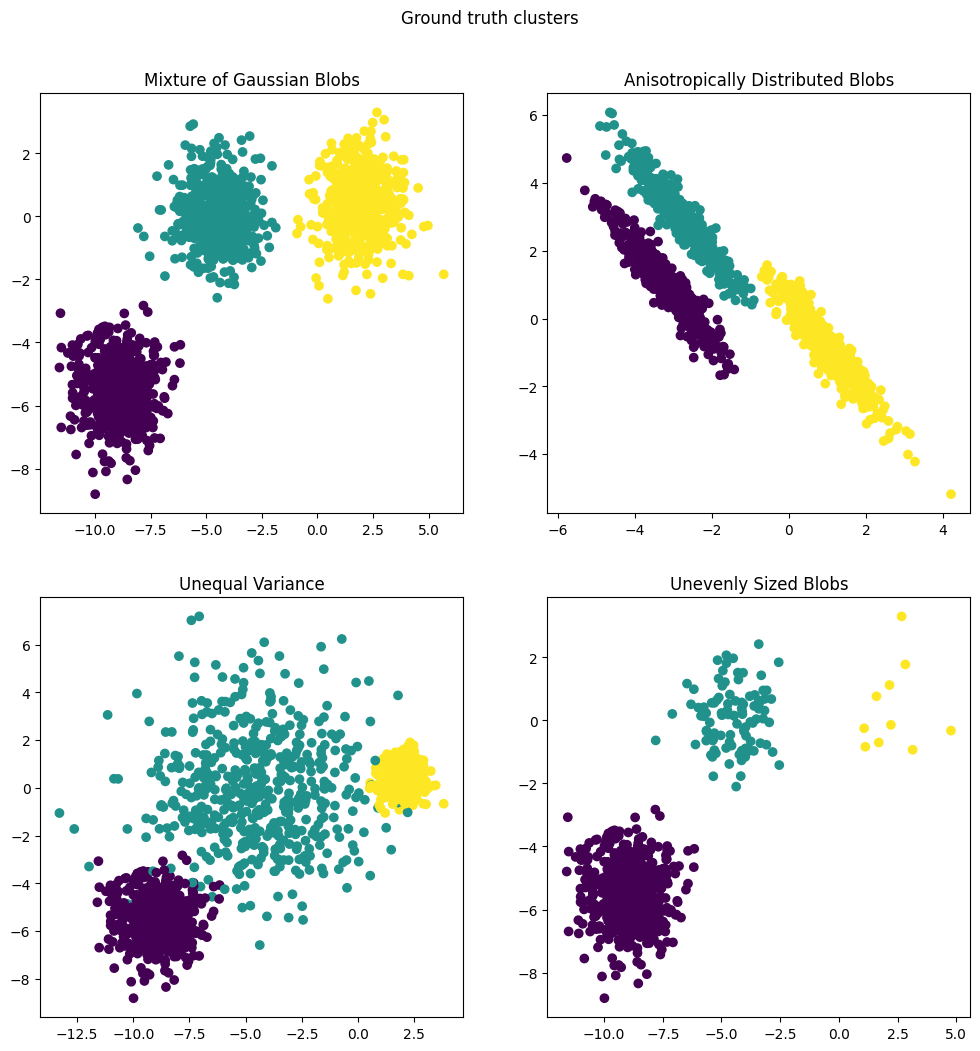

In [4]:
import matplotlib.pyplot as plt
# Create a 2x2 grid of subplots and set the figure size to 12x12 inches.
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

# First subplot (top-left): plot a scatter plot of the Gaussian blobs.
# Uses `X[:, 0]` and `X[:, 1]` as coordinates and colors each point based on `y`.
axs[0, 0].scatter(X[:, 0], X[:, 1], c=y)
axs[0, 0].set_title("Mixture of Gaussian Blobs")

# Second subplot (top-right): plot a scatter plot for anisotropically distributed blobs.
# `X_aniso[:, 0]` and `X_aniso[:, 1]` are coordinates, colored by `y`.
axs[0, 1].scatter(X_aniso[:, 0], X_aniso[:, 1], c=y)
axs[0, 1].set_title("Anisotropically Distributed Blobs")

# Third subplot (bottom-left): scatter plot of blobs with unequal variances.
# `X_varied[:, 0]` and `X_varied[:, 1]` as coordinates, with color based on `y_varied`.
axs[1, 0].scatter(X_varied[:, 0], X_varied[:, 1], c=y_varied)
axs[1, 0].set_title("Unequal Variance")

# Fourth subplot (bottom-right): scatter plot for blobs of uneven sizes.
# `X_filtered[:, 0]` and `X_filtered[:, 1]` as coordinates, colored by `y_filtered`.
axs[1, 1].scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_filtered)
axs[1, 1].set_title("Unevenly Sized Blobs")

# Sets a common title for all subplots with an adjusted position to prevent overlap.
plt.suptitle("Ground truth clusters").set_y(0.95)

plt.show()

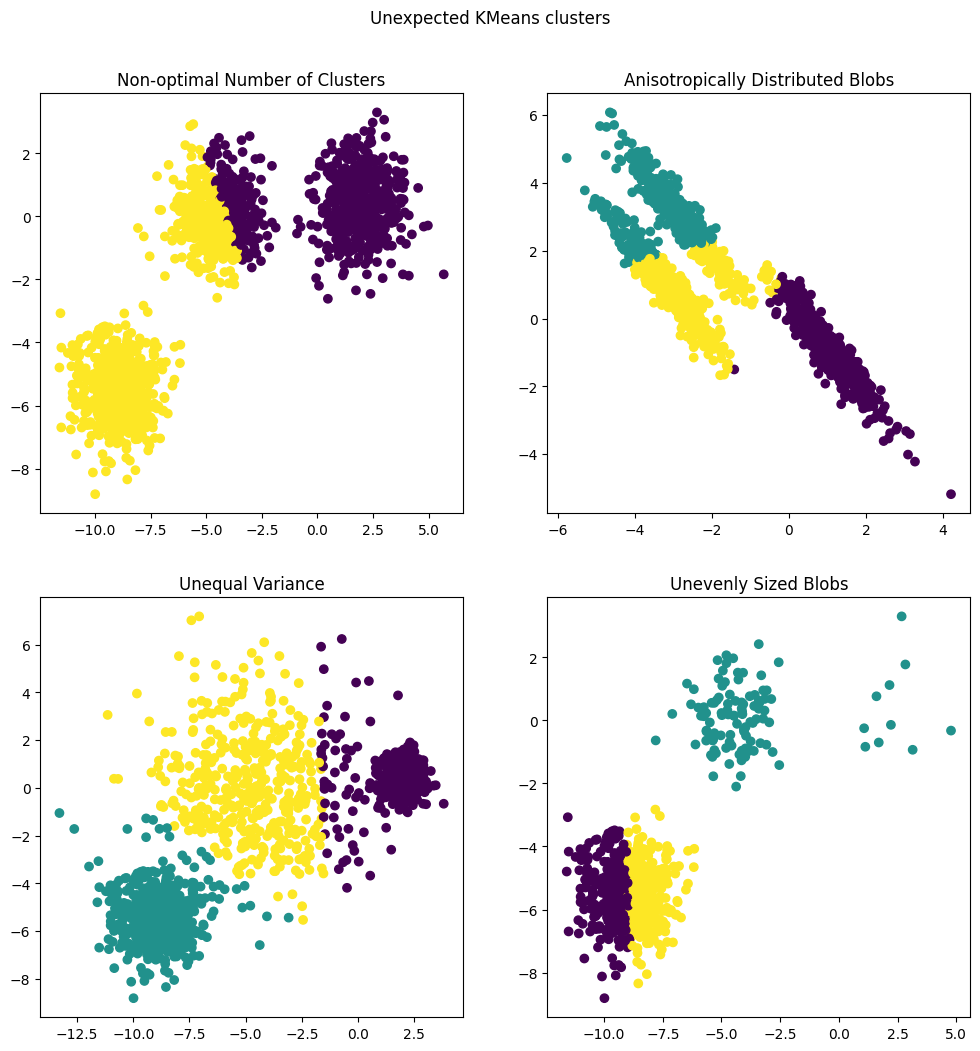

In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Common parameters for KMeans clustering, including a fixed random state for reproducibility
common_params = {
    "n_init": "auto",          # Determines the number of times the algorithm is run with different centroid seeds
    "random_state": random_state,  # Ensures the results are reproducible
}

# Create a 2x2 grid of subplots with a figure size of 12x12 inches
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

# First subplot: apply KMeans with 2 clusters to the data X, though it may not be optimal
y_pred = KMeans(n_clusters=2, **common_params).fit_predict(X)
axs[0, 0].scatter(X[:, 0], X[:, 1], c=y_pred)
axs[0, 0].set_title("Non-optimal Number of Clusters")

# Second subplot: apply KMeans with 3 clusters to anisotropically distributed data X_aniso
y_pred = KMeans(n_clusters=3, **common_params).fit_predict(X_aniso)
axs[0, 1].scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
axs[0, 1].set_title("Anisotropically Distributed Blobs")

# Third subplot: apply KMeans with 3 clusters to data with unequal variances X_varied
y_pred = KMeans(n_clusters=3, **common_params).fit_predict(X_varied)
axs[1, 0].scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
axs[1, 0].set_title("Unequal Variance")

# Fourth subplot: apply KMeans with 3 clusters to data with unevenly sized blobs X_filtered
y_pred = KMeans(n_clusters=3, **common_params).fit_predict(X_filtered)
axs[1, 1].scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
axs[1, 1].set_title("Unevenly Sized Blobs")

# Set a main title for the figure with an adjusted position to prevent overlap with subplots
plt.suptitle("Unexpected KMeans clusters").set_y(0.95)

plt.show()


# 2.1 Comparing results

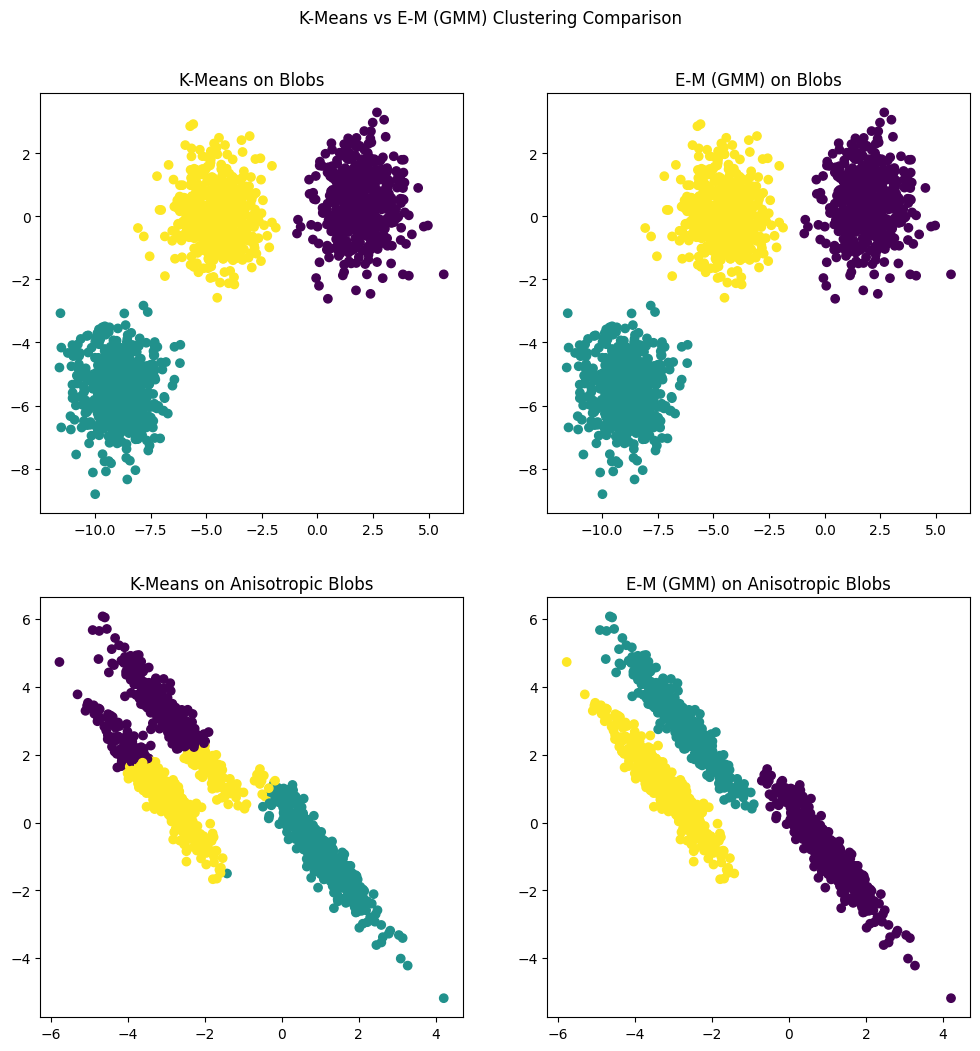

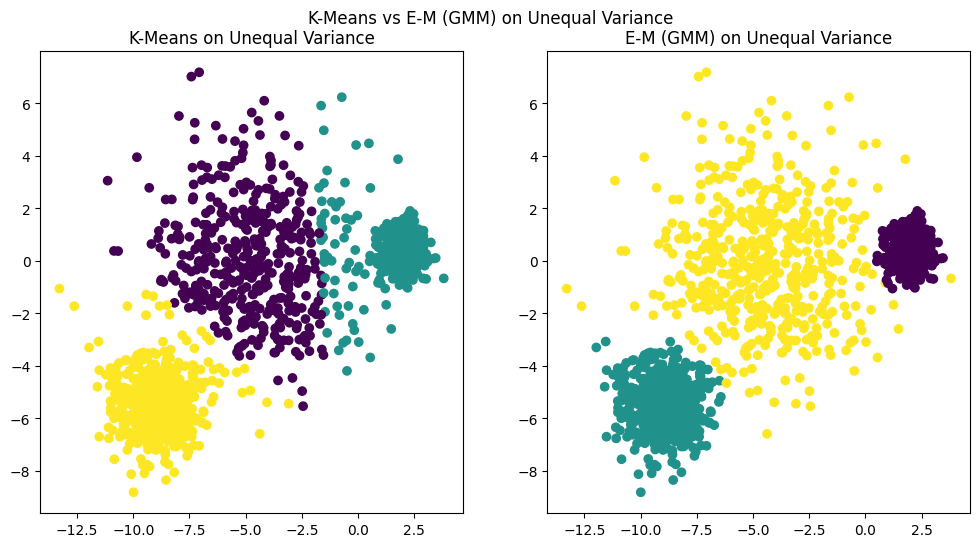

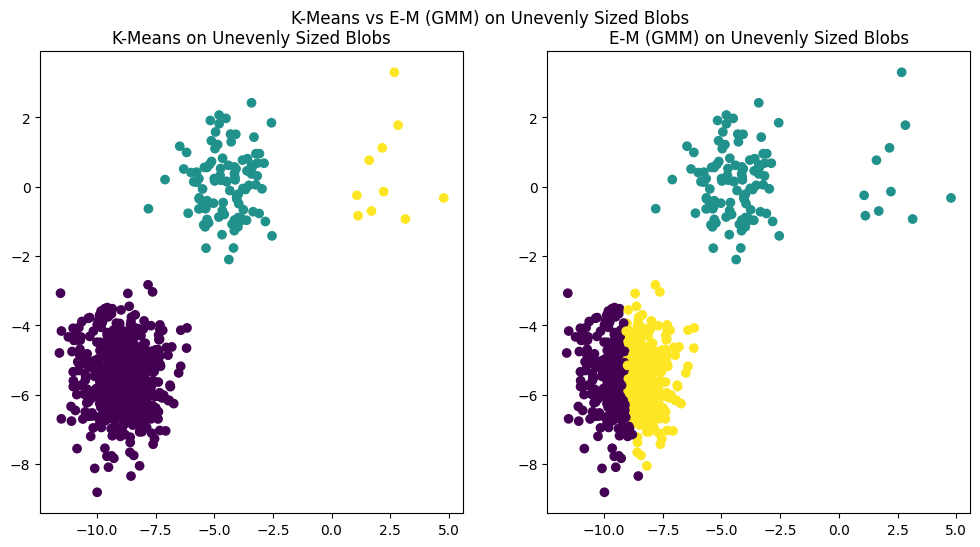

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

# Generate datasets
n_samples = 1500
random_state = 170
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]

# 1. Original Gaussian blobs
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

# 2. Anisotropic blobs (transformed version of original blobs)
X_aniso = np.dot(X, transformation)

# 3. Blobs with unequal variances
X_varied, y_varied = make_blobs(n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state)

# 4. Blobs with uneven sizes (different number of points in each cluster)
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
y_filtered = [0] * 500 + [1] * 100 + [2] * 10

# Helper function to plot the results
def plot_clusters(X, y_pred, title, ax):
    ax.scatter(X[:, 0], X[:, 1], c=y_pred)
    ax.set_title(title)

# Run KMeans and EM (GMM) clustering on each dataset
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# 1. Original blobs with a non-optimal number of clusters
kmeans = KMeans(n_clusters=3, n_init=10, random_state=random_state)
y_pred_kmeans = kmeans.fit_predict(X)
gmm = GaussianMixture(n_components=3, random_state=random_state)
y_pred_gmm = gmm.fit_predict(X)

plot_clusters(X, y_pred_kmeans, "K-Means on Blobs", axs[0, 0])
plot_clusters(X, y_pred_gmm, "E-M (GMM) on Blobs", axs[0, 1])

# 2. Anisotropic blobs
kmeans_aniso = KMeans(n_clusters=3, n_init=10, random_state=random_state)
y_pred_kmeans_aniso = kmeans_aniso.fit_predict(X_aniso)
gmm_aniso = GaussianMixture(n_components=3, random_state=random_state)
y_pred_gmm_aniso = gmm_aniso.fit_predict(X_aniso)

plot_clusters(X_aniso, y_pred_kmeans_aniso, "K-Means on Anisotropic Blobs", axs[1, 0])
plot_clusters(X_aniso, y_pred_gmm_aniso, "E-M (GMM) on Anisotropic Blobs", axs[1, 1])

plt.suptitle("K-Means vs E-M (GMM) Clustering Comparison", y=0.95)
plt.show()

# 3. Blobs with unequal variances
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

kmeans_varied = KMeans(n_clusters=3, n_init=10, random_state=random_state)
y_pred_kmeans_varied = kmeans_varied.fit_predict(X_varied)
gmm_varied = GaussianMixture(n_components=3, random_state=random_state)
y_pred_gmm_varied = gmm_varied.fit_predict(X_varied)

plot_clusters(X_varied, y_pred_kmeans_varied, "K-Means on Unequal Variance", axs[0])
plot_clusters(X_varied, y_pred_gmm_varied, "E-M (GMM) on Unequal Variance", axs[1])

plt.suptitle("K-Means vs E-M (GMM) on Unequal Variance", y=0.95)
plt.show()

# 4. Blobs with uneven sizes
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

kmeans_filtered = KMeans(n_clusters=3, n_init=10, random_state=random_state)
y_pred_kmeans_filtered = kmeans_filtered.fit_predict(X_filtered)
gmm_filtered = GaussianMixture(n_components=3, random_state=random_state)
y_pred_gmm_filtered = gmm_filtered.fit_predict(X_filtered)

plot_clusters(X_filtered, y_pred_kmeans_filtered, "K-Means on Unevenly Sized Blobs", axs[0])
plot_clusters(X_filtered, y_pred_gmm_filtered, "E-M (GMM) on Unevenly Sized Blobs", axs[1])

plt.suptitle("K-Means vs E-M (GMM) on Unevenly Sized Blobs", y=0.95)
plt.show()



# 3. Conclusion

In this comparison between KMeans and Gaussian Mixture Models (GMM) using the Expectation-Maximization (E-M) algorithm, we see distinct strengths in each method across different dataset structures. KMeans performs well on spherical, equally sized, and evenly distributed clusters, making it efficient and effective for simpler datasets that fit these assumptions. However, KMeans struggles with elongated clusters, clusters of unequal variance, and clusters with significantly different sizes. GMM, by contrast, is more adaptable in these complex cases, thanks to its ability to model clusters with different shapes, sizes, and variances. This flexibility comes from GMM’s use of covariance matrices for each cluster, allowing it to better fit data with irregular distributions. While GMM is more computationally intensive, it offers better performance on challenging datasets where cluster characteristics vary. Overall, KMeans is a faster, simpler choice for well-behaved data, while GMM provides more robust clustering on complex datasets with varied cluster structures.

# 4. Refereces

https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_assumptions.html#sphx-glr-auto-examples-cluster-plot-kmeans-assumptions-py
